# https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(0)
    
def generate_graph(V, E):
    if E > V*V:
        print("E > V^2")
        return nx.Graph()
    G = nx.empty_graph(V, nx.DiGraph())
    for e in range(1, (E//V)+1):
        for v in range(V):
            #G.add_weighted_edges_from([(v, (v+e)%(V), e)])  
            G.add_weighted_edges_from([(v, (v+e)%(V), random.randint(1,10))]) 
    for v in range(0, E%V):
        #G.add_weighted_edges_from([(v, (v+(E//V)+1)%(V), (E//V)+1)])
        G.add_weighted_edges_from([(v, (v+(E//V)+1)%(V), random.randint(1,10))])
    return G

G = generate_graph(1000, 1000*1000)

'''
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G,pos)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()
'''
print(nx.adjacency_matrix(G).todense())
G.number_of_edges()

[[10  7  3 ...  5  5  6]
 [ 1  9  7 ...  1  8  9]
 [ 2  4  4 ...  7  8  5]
 ...
 [ 8  6  7 ...  3  2  8]
 [ 4  2  7 ...  3 10 10]
 [ 2  6 10 ... 10  9  4]]


1000000

(a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we
use an array for the priority queue. Implement the Dijkstra’s algorithm using this
setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically.

In [2]:
import sys
def dijkstra_matrix(G, src):
    adjM = nx.adjacency_matrix(G).todense()
    V = G.number_of_nodes()
    d = [sys.maxsize] * V
    pi = [-1] * V
    S = [0] * V
    KC = 0

    d[src] = 0;
    pi[src] = src;
    # Main Loop --- O(|V|)
    for i in range(V):
        shortest = sys.maxsize
        # Finding shortest distance --- O(|V|)
        for v in range(V):
            KC += 1
            if S[v] == 0 and d[v] < shortest:
                # Updating priority queue --- O(1)
                shortest = d[v]
                u = v
                
        S[u] = 1
        # Checking adjancency matrix --- O(|V|)
        for v in range(V):
            KC += 1
            if adjM[u][v] > 0 and S[v] == 0 and d[v] > d[u] + adjM[u][v]:
                d[v] = d[u] + adjM[u][v]
                pi[v] = u
    return V, d, pi, KC
# Total time complexity = |V| * (|V| + |V|) = 2|V|^2
            
def print_result(V, d, pi, src):
    print("Vertex \tDistance from Source\tPredecessor")
    for v in range(V):
        print(v, "\t\t", d[v], "\t\t", pi[v])
    
    plt.figure(figsize=(10,6))
    SPT = nx.DiGraph()
    for v in range(V):
        if v != src:
            dist = d[v] - d[pi[v]]
            SPT.add_weighted_edges_from([(pi[v], v, dist)])
    pos = nx.spring_layout(SPT, seed=0)
    nx.draw_networkx(SPT,pos)
    edge_labels = nx.get_edge_attributes(SPT, "weight")
    nx.draw_networkx_edge_labels(SPT, pos, edge_labels)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    print(nx.adjacency_matrix(SPT).todense())
    
V, d, pi, KC = dijkstra_matrix(G, 0)
print("Number of Key Comparisons:", KC)
#print_result(V, d, pi, 0)

Number of Key Comparisons: 2000000


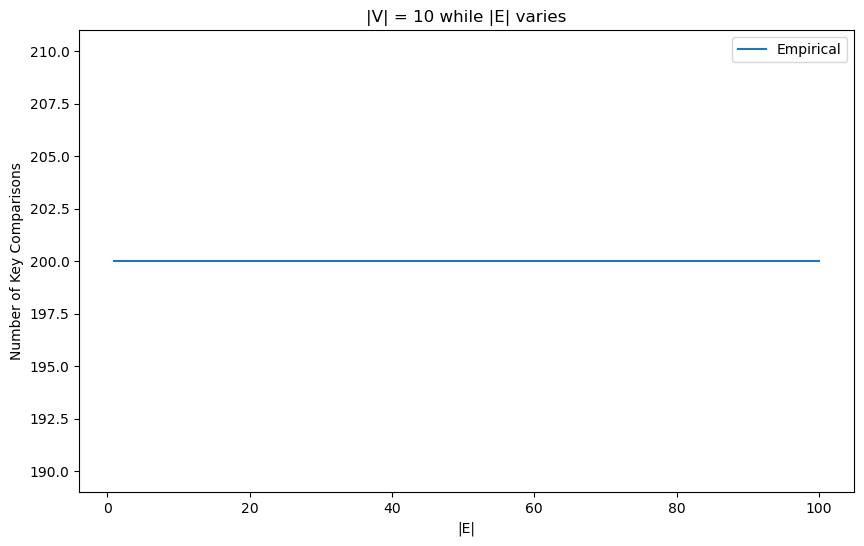

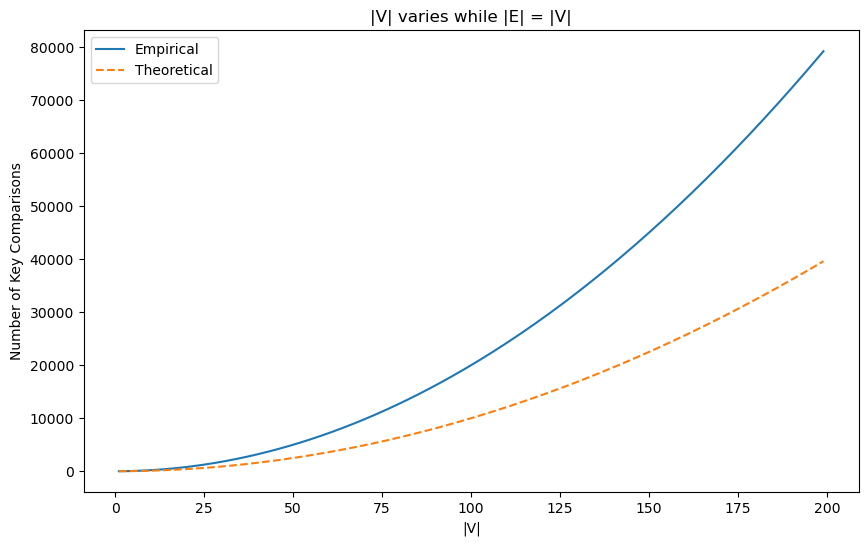

In [3]:
V = 10
EArr = np.arange(1, V**2+1, 1)
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_matrix(generate_graph(V, E), 0)
    KCArr.append(KC)

plt.figure(figsize=(10,6))
plt.plot(EArr, KCArr, label = "Empirical")
plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()

VArr = np.arange(1, 200, 1)
KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_matrix(generate_graph(V, V), 0)
    KCArr.append(KC)

plt.figure(figsize=(10,6))
plt.plot(VArr, KCArr, label = "Empirical")
plt.plot(VArr, VArr**2, label = "Theoretical", linestyle = "--")
plt.xlabel("|V|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| varies while |E| = |V|")
plt.legend()
plt.show()

(b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and
we use a minimizing heap for the priority queue. Implement the Dijkstra’s
algorithm using this setting and analyze its time complexity with respect to |V|
and |E| both theoretically and empirically. 

# https://github.com/python/cpython/blob/3.12/Lib/heapq.py

In [4]:
import heapq

# DIRECTLY FROM THE SOURCE FILE, ADJUSTED TO INCLUDED KEY COMPARISONS#
def heappush(heap, item):
    KC = 0
    """Push item onto heap, maintaining the heap invariant."""
    heap.append(item)
    KC += _siftdown(heap, 0, len(heap)-1)
    return KC

def heappop(heap):
    KC = 0
    """Pop the smallest item off the heap, maintaining the heap invariant."""
    lastelt = heap.pop()    # raises appropriate IndexError if heap is empty
    if heap:
        returnitem = heap[0]
        heap[0] = lastelt
        KC += _siftup(heap, 0)
        return returnitem, KC
    return lastelt, KC

def _siftdown(heap, startpos, pos):
    KC = 0
    newitem = heap[pos]
    # Follow the path to the root, moving parents down until finding a place
    # newitem fits.
    while pos > startpos:
        KC += 1
        parentpos = (pos - 1) >> 1
        parent = heap[parentpos]
        if newitem < parent:
            heap[pos] = parent
            pos = parentpos
            continue
        break
    heap[pos] = newitem
    
    return KC
    
def _siftup(heap, pos):
    KC = 0
    endpos = len(heap)
    startpos = pos
    newitem = heap[pos]
    # Bubble up the smaller child until hitting a leaf.
    childpos = 2*pos + 1    # leftmost child position
    while childpos < endpos:
        KC += 1
        # Set childpos to index of smaller child.
        rightpos = childpos + 1
        if rightpos < endpos and not heap[childpos] < heap[rightpos]:
            childpos = rightpos
        # Move the smaller child up.
        heap[pos] = heap[childpos]
        pos = childpos
        childpos = 2*pos + 1
    # The leaf at pos is empty now.  Put newitem there, and bubble it up
    # to its final resting place (by sifting its parents down).
    heap[pos] = newitem
    KC += _siftdown(heap, startpos, pos)
    
    return KC

In [5]:
def dijkstra_list(G, src):
    adjL = gen_adjL(G)
    V = G.number_of_nodes()
    d = [sys.maxsize] * V
    pi = [-1] * V
    S = [0] * V
    pq = []
    KC = 0

    
    d[src] = 0
    pi[src] = src
    KC += heappush(pq, (d[src], src))
    
    # Main loop --- O(|V|)
    while pq:
        (_ , u), key = heappop(pq) #--- O(log|V|)
        KC += key
        S[u] = 1
        
        # Checking adjancency list --- O(|E|/|V|)
        for v, w in adjL[u]:
            KC += 1
            if S[v] == 0  and d[v] > d[u] + w:
                d[v] = d[u] + w
                pi[v] = u
                KC += heappush(pq, (d[v], v))  #--- O(log|V|)
        # Summed complexity = O(|E|/|V| log |V|)
    return V, d, pi, KC
# Total time complexity = O(|V| * (log|V| + |E|/|V| log |V|)) = O((|V|+|E|)log|V|)
    
def gen_adjL(G):
    V = G.number_of_nodes()
    adjL = [[] for _ in range(V)]
    edgelist = list(nx.to_edgelist(G))
    for entry in edgelist:
        adjL[entry[0]].append((entry[1], entry[2]['weight']))
    return adjL
    
    
V, d, pi, KC = dijkstra_list(G, 0)
print("Number of Key Comparisons:", KC)
#print_result(V, d, pi, 0)

Number of Key Comparisons: 2659424


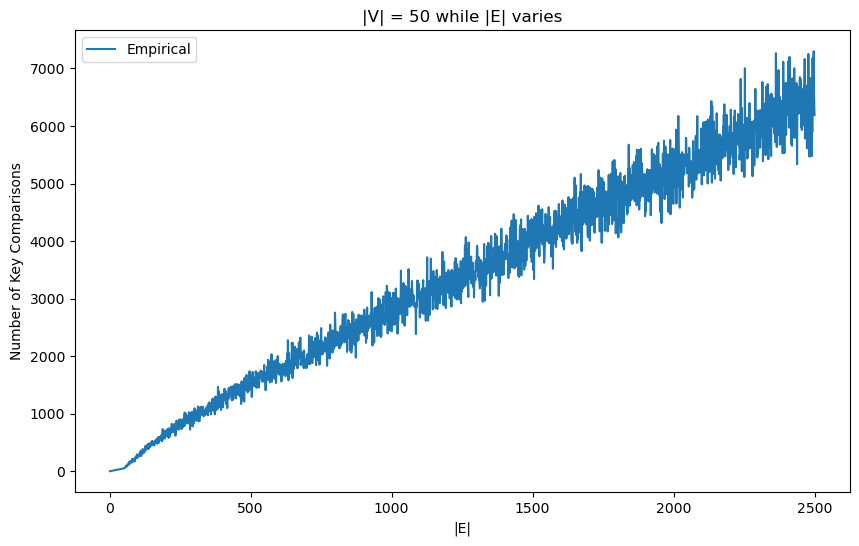

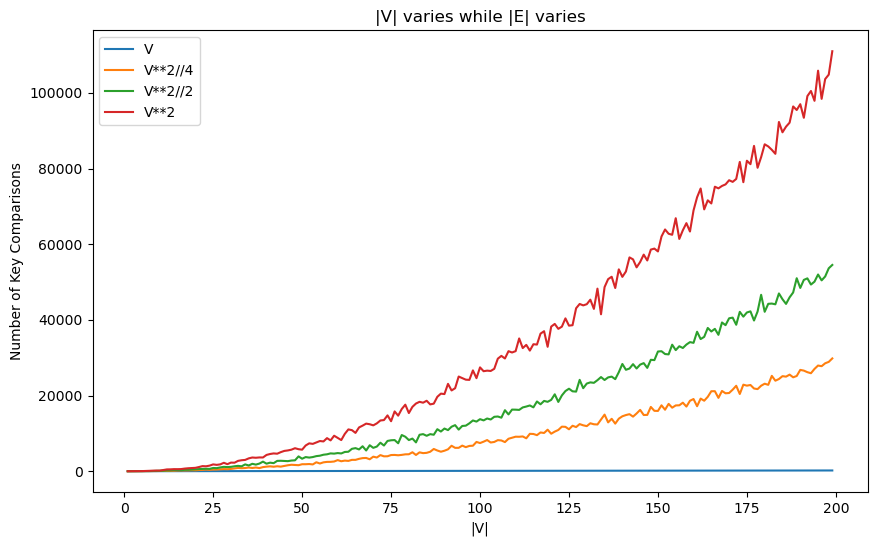

In [21]:
V = 50
EArr = np.arange(1, V**2+1, 1)
KCArr = []
for E in EArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, E), 0)
    KCArr.append(KC)

plt.figure(figsize=(10,6))
plt.plot(EArr, KCArr, label = "Empirical")
plt.xlabel("|E|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| = {} while |E| varies".format(V))
plt.legend()
plt.show()

VArr = np.arange(1, 200, 1)
KCArr = []
plt.figure(figsize=(10,6))
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2//4), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//4")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2//2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2//2")

KCArr = []
for V in VArr:
    V, d, pi, KC = dijkstra_list(generate_graph(V, V**2), 0)
    KCArr.append(KC)
plt.plot(VArr, KCArr, label = "V**2")

plt.xlabel("|V|")
plt.ylabel("Number of Key Comparisons")
plt.title("|V| varies while |E| remains")
plt.legend()
plt.show()

(c) Compare the two implementations in (a) and (b). Discuss which implementation
is better and in what circumstances. 